_________________

# Imports

Import all relevant dependencies
_________________

In [1]:
import torch
from utils import plot_digits, plot_original_vs_encoded

from models.autoencoder.autoencoder import  Autoencoder
from models.ebm.energy_net import EnergyNet

import matplotlib.pyplot as plt


_________________

# Load Autoencoder and EBM
The best parameters are saved with the prefix 'best' in the checkpoints folder
_________________

In [2]:
# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Load Autoencoder
autoencoder = Autoencoder(input_dim=28*28, hidden_dim=1024, encoded_dim=4)
autoencoder.to(device)

# Load pretrained best checkpoint
best_autoencoder_ckpt_path = './saved_ckpts/autoencoder/autoencoder_best.pth'
autoencoder.load_pretrained_model(model_ckpt_path=best_autoencoder_ckpt_path)

Model Loaded Sucessully


In [4]:
# Load EBM
energy_model = EnergyNet(in_dim=autoencoder.encoded_dim, autoencoder_ckpt_path=autoencoder.ckpt_path ,hid_dim=8)
energy_model.to(device)

# Load pretrained best checkpoint
best_ebm_ckpt_path = './saved_ckpts/ebm/ebm_best.pth'
energy_model.load_pretrained_model(model_ckpt_path=best_ebm_ckpt_path)

Model Loaded Sucessully


_________________________
# Autoencoder : Inference
Lets first see how the autoencoder performs
_________________________


In [5]:
# Run this after running the Dataset section of train.ipynb
X_test   = torch.load('./data/MNIST_binary/X_test.pt').to(torch.float32)

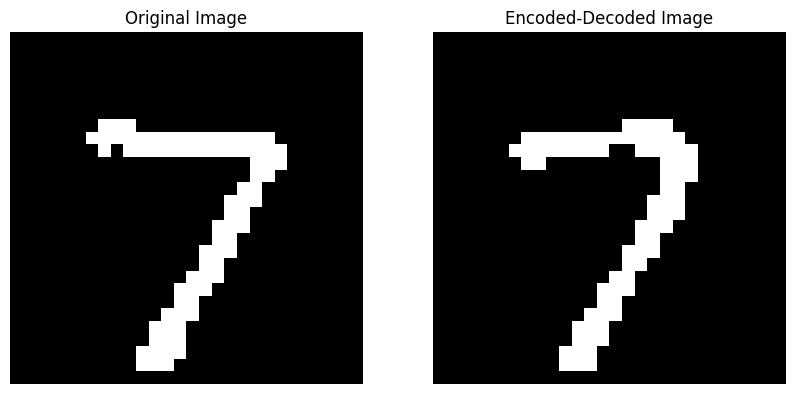

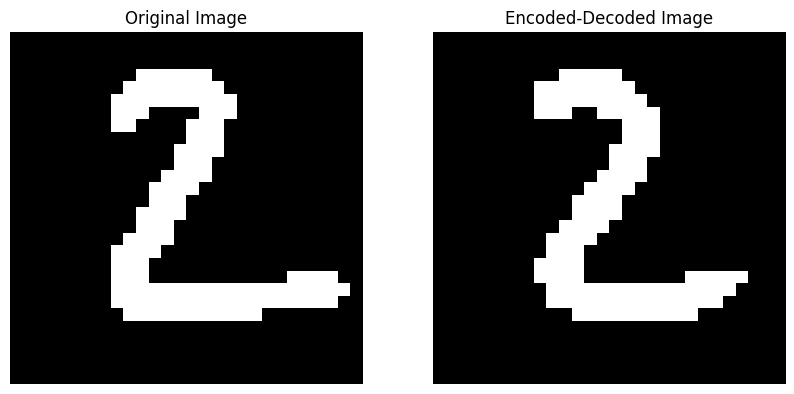

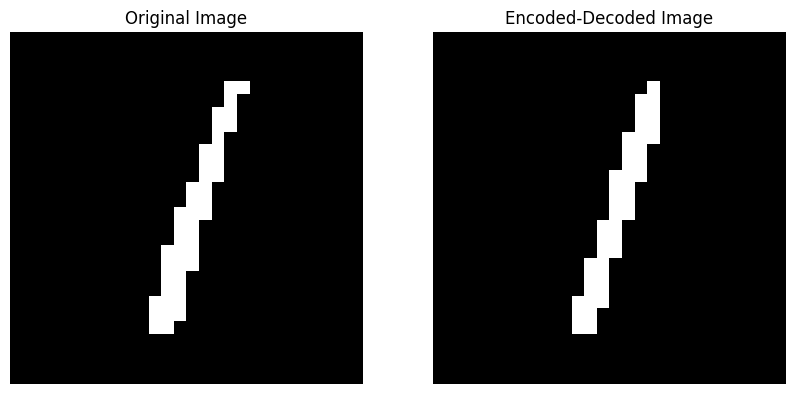

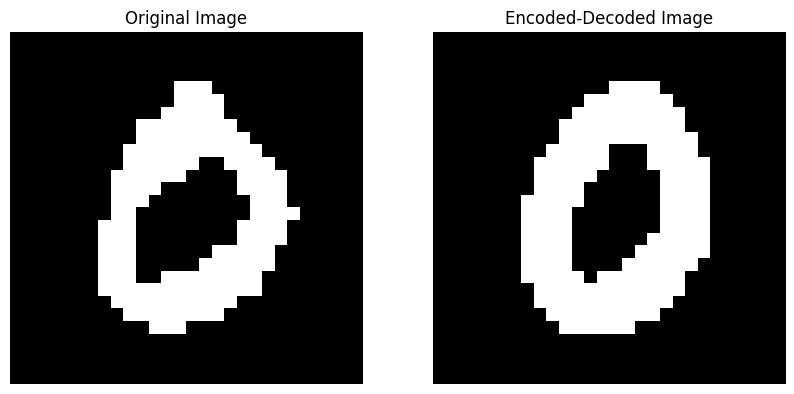

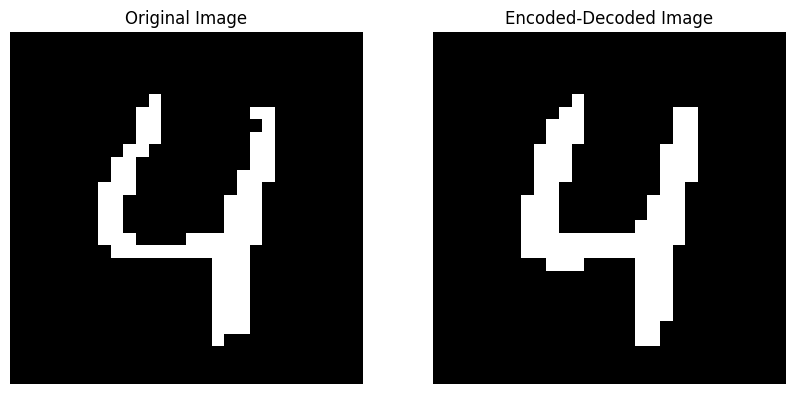

In [6]:
# Pass images through autoencoder
for idx in range(5):
    plot_original_vs_encoded(x=X_test[idx], model=autoencoder)

______________________________

# EBM : Inference
Once the autoencoder is ready, we move onto see the results of trained EBM
______________________________



In [7]:
# Generate images from energy model
generated_images  = energy_model.generate_images(autoencoder=autoencoder, num_images=25, device=device)

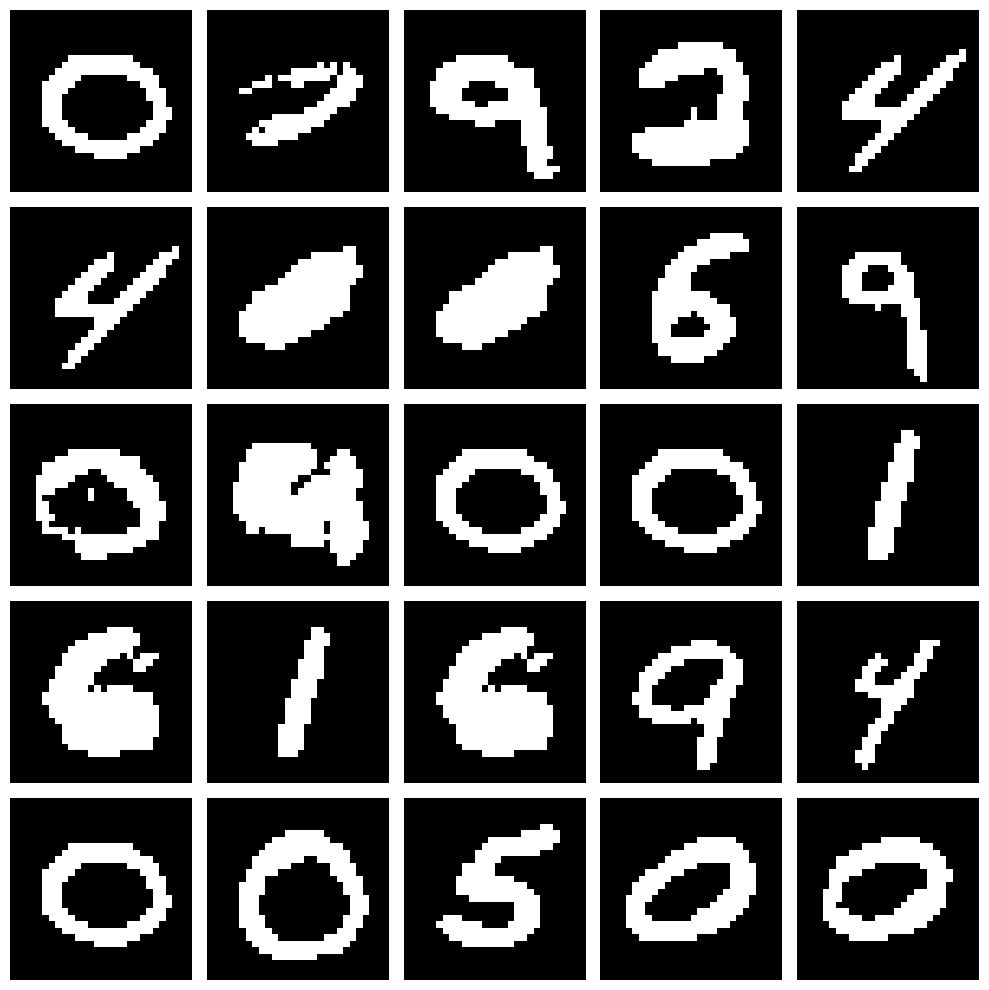

In [8]:
# Visualise the generated images
plot_digits(X=generated_images, Y=None, n=25)

_______________________

# THANK YOU
_______________________


In [11]:
from models.ebm.energy_net_utils import langevin_MCMC

In [12]:
energy_model

EnergyNet(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=1, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [13]:
X, X_samples =  langevin_MCMC(f_theta=energy_model, input_dim=autoencoder.encoded_dim,  
                              batch_size=5, num_steps=10000, eps=.001, 
                              interval_samples=True)

# generated_data = autoencoder.decoder.predict(x_sample.to(device))
# generated_data = generated_data.detach().to('cpu')
# generated_data = generated_data.reshape(-1,28,28)

In [18]:
X_samples[3]

tensor([[ 0.9148,  1.5836, -0.2235,  0.4530],
        [ 0.7292,  0.8492, -0.7973, -0.0326],
        [ 1.9266, -0.9282,  0.0980, -2.0286],
        [-0.6348, -0.4057, -0.3005, -0.3613],
        [-0.6123,  1.3144,  0.4569, -0.0536]])

In [19]:
X

tensor([[ 6.5103, 10.1333, -8.3897,  4.4175],
        [ 4.1553, -2.6721,  4.2443, -1.5364],
        [ 7.5034,  0.2007, -5.9093, -1.4037],
        [-5.4516, -3.7320,  7.1328,  8.6296],
        [ 1.9912, -0.3831,  3.9350, -0.6624]])

In [20]:
generated_data = autoencoder.decoder.predict(X_samples[1].to(device))
generated_data = generated_data.detach().to('cpu')
generated_data = generated_data.reshape(-1,28,28)

In [21]:
generated_data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0

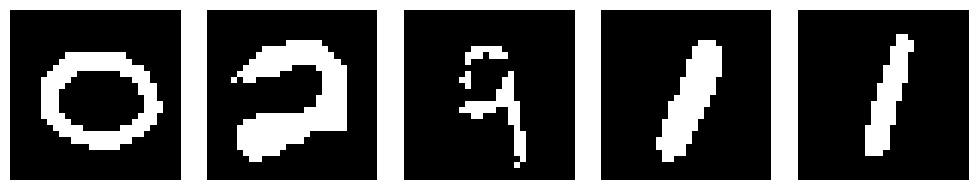

In [22]:
plot_digits(X=generated_images, Y=None, n=5)